In [2]:
#Assignment 12 - Web Scrapping using Python

# Name: VIDEESH REDDY GARLAPATI
# G Number - G01354939

import requests
import urllib3
import csv
import pandas as pd


urllib3.disable_warnings()
r = requests.get('https://repo.vse.gmu.edu/ait/AIT580/580books.html', verify=False)

from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all('td', attrs={'valign':'top'})

table_of_books = soup.table
with open('Books_of_python.csv', 'w') as racks:
   stacker = csv.writer(racks)
   for tr in table_of_books.find_all('tr'):
       each_row = []
       for td in tr.find_all('td'):
           # print(td.get_text())
           what = td.get_text()
           if td.a != None:
               a_tag = td.a
               what = what + '-' + a_tag.attrs["href"]
           # print(td.find_all('a'))
           each_row.append(what)
       stacker.writerow(each_row)
   racks.close()

In [8]:

# 2.a Print the frequency count for publishers (that is, how many books for each publisher)

import matplotlib.pyplot as plt

df = pd.read_csv('Books_of_python.csv')
Freq_count = df['Publisher\r\n'].to_frame()
print(Freq_count.value_counts())

Publisher\r\n      
O'Reilly Media         4
Packt Publishing       2
Elsevier / Syngress    1
Maker Media, Inc       1
No Starch Press        1
Pragmatic Bookshelf    1
dtype: int64


<AxesSubplot:xlabel='Publisher\r\n'>

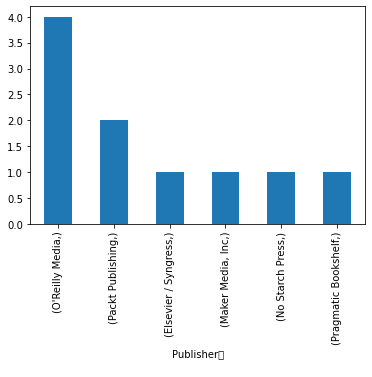

In [14]:
# 2b. Visualize the output of (a) using a chart of your own choice
Freq_count.value_counts().plot(kind='bar')

In [16]:
# 2.c Print the frequency count for year of publication

dates = []
for date in df['PubDate\r\n'].dropna():
    date = '20' + date[-2:]
    dates.append(date)
df = pd.Series(dates, name = 'PubDate')
Freq_Years = df.to_frame()
print(Freq_Years.value_counts())


PubDate
2017       5
2016       4
2013       1
dtype: int64


<AxesSubplot:xlabel='PubDate'>

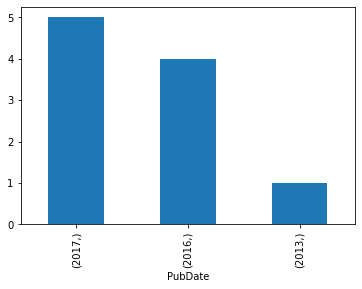

In [22]:
# 2.d Visualize the output of (b) using a chart of your own choice

Freq_Years.value_counts().plot(kind='bar')